# Gaussian noise removal
In this notebook all the mentioned filters in my thesis along with the proposed K-SVD algorithm are applied to an MR image with different levels of noise.

In [1]:
from src.Filters.Adaptive_Median import *
from src.Filters.Adaptive_Wiener import *
from src.Filters.KSVD_Bilateral import *
import cv2 as cv
import matplotlib.pyplot as plt
from src.functions import *
from scipy.signal import wiener

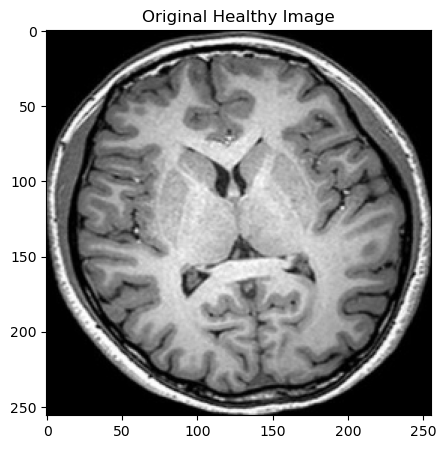

In [2]:
original_healthy_img = cv.imread("src/Images/Normal_Brain.jpg", cv.IMREAD_GRAYSCALE)
imshow(original_healthy_img, "Original Healthy Image")

Now that we have our original image let's add gaussian noise to it with three different intensities.

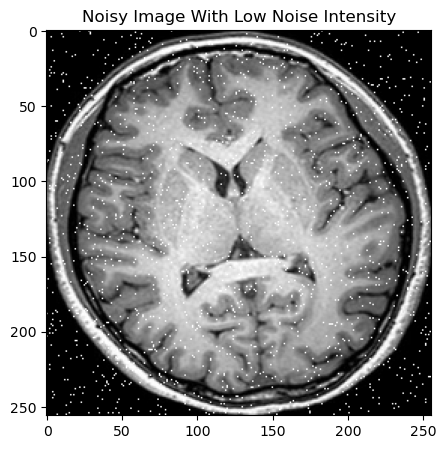

In [3]:
noisy_low = add_gaussian_noise(original_healthy_img, std=0.5)
imshow(noisy_low, "Noisy Image with Low noise intensity")

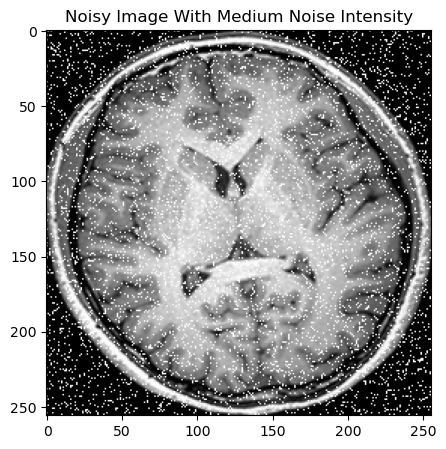

In [4]:
noisy_mid = add_gaussian_noise(original_healthy_img, std=0.75)
imshow(noisy_mid, "Noisy Image with Medium noise intensity")

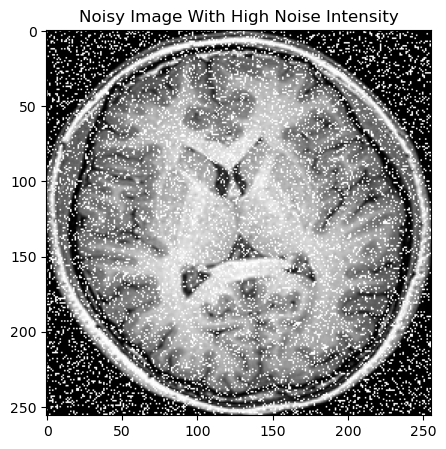

In [5]:
noisy_high = add_gaussian_noise(original_healthy_img, std=1)
imshow(noisy_high, "Noisy Image with High noise intensity")

## 1.Median Filter
In this section, we will apply the median filter to the noisy image with three different levels of noise.

In [6]:
restored_median_low = cv.medianBlur(noisy_low, 3)
psnr_median_low = calculate_psnr(original_healthy_img, restored_median_low)

In [7]:
restored_median_mid = cv.medianBlur(noisy_mid, 3)
psnr_median_mid = calculate_psnr(original_healthy_img, restored_median_mid)

In [8]:
restored_median_high = cv.medianBlur(noisy_high, 3)
psnr_median_high = calculate_psnr(original_healthy_img, restored_median_high)

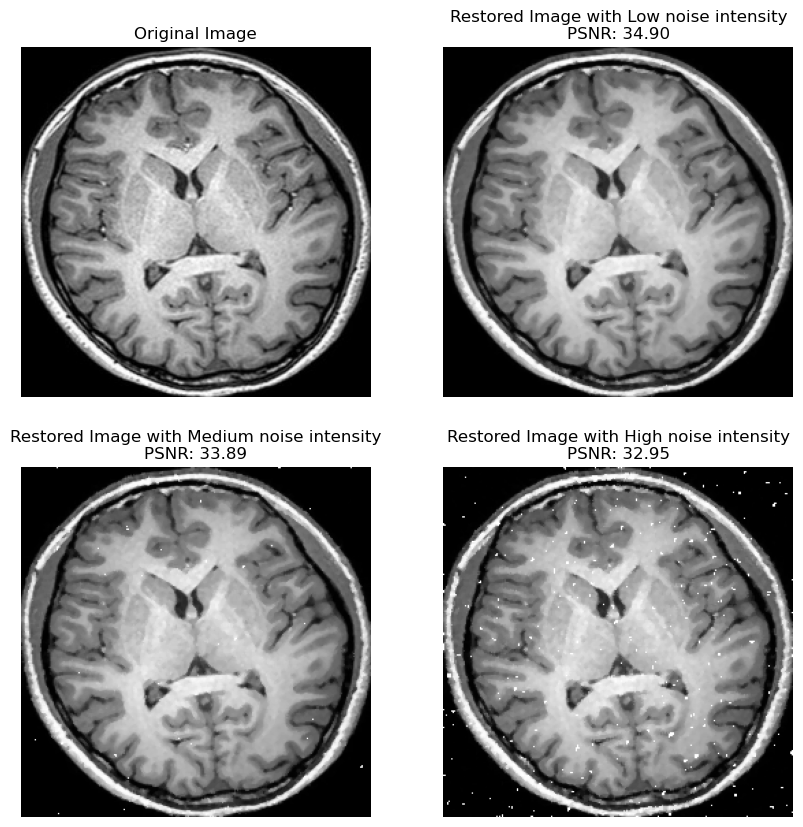

In [9]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_healthy_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_median_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_median_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_median_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_median_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_median_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_median_high))
plt.axis('off')

plt.show()

As predicted, the median filter is only effective in removing noise when the noise intensity is low. When the noise intensity is high, the median filter is not effective in removing noise.

## 2. Adaptive Median Filter
In this section, we will apply the adaptive median filter to the noisy image with three different levels of noise.

In [10]:
restored_adapmedian_low = adaptive_median_filter(noisy_low, 3, 11)
psnr_adapmedian_low = calculate_psnr(original_healthy_img, restored_adapmedian_low)

In [11]:
restored_adapmedian_mid = adaptive_median_filter(noisy_mid, 3, 11)
psnr_adapmedian_mid = calculate_psnr(original_healthy_img, restored_adapmedian_mid)

In [12]:
restored_adapmedian_high = adaptive_median_filter(noisy_high, 3, 11)
psnr_adapmedian_high = calculate_psnr(original_healthy_img, restored_adapmedian_high)

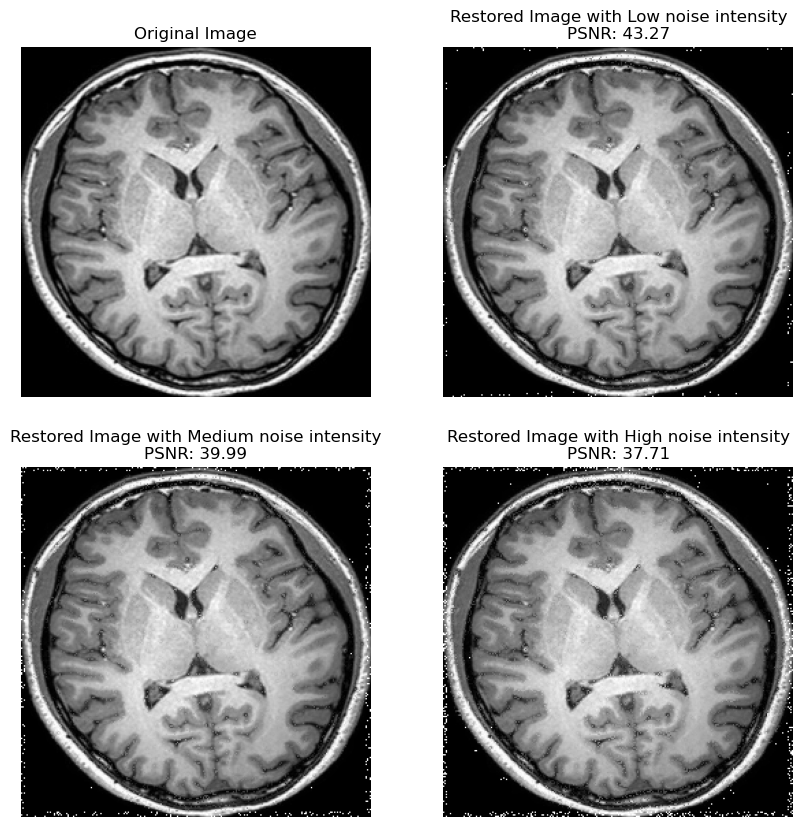

In [13]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_healthy_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_adapmedian_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_adapmedian_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_adapmedian_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_adapmedian_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_adapmedian_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_adapmedian_high))
plt.axis('off')

plt.show()

By comparing the results of the median filter and the adaptive median filter, we can see that the adaptive median filter is more effective in removing noise than the median filter.

## 3.Wiener Filter
In this section, we will apply the Wiener filter to the noisy image with three different levels of noise.

In [14]:
restored_wiener_low = wiener(noisy_low, (original_healthy_img.shape[0], original_healthy_img.shape[1]))
psnr_wiener_low = calculate_psnr(original_healthy_img, restored_wiener_low)

In [15]:
restored_wiener_mid = wiener(noisy_mid, (original_healthy_img.shape[0], original_healthy_img.shape[1]))
psnr_wiener_mid = calculate_psnr(original_healthy_img, restored_wiener_mid)

In [16]:
restored_wiener_high = wiener(noisy_high, (original_healthy_img.shape[0], original_healthy_img.shape[1]))
psnr_wiener_high = calculate_psnr(original_healthy_img, restored_wiener_high)

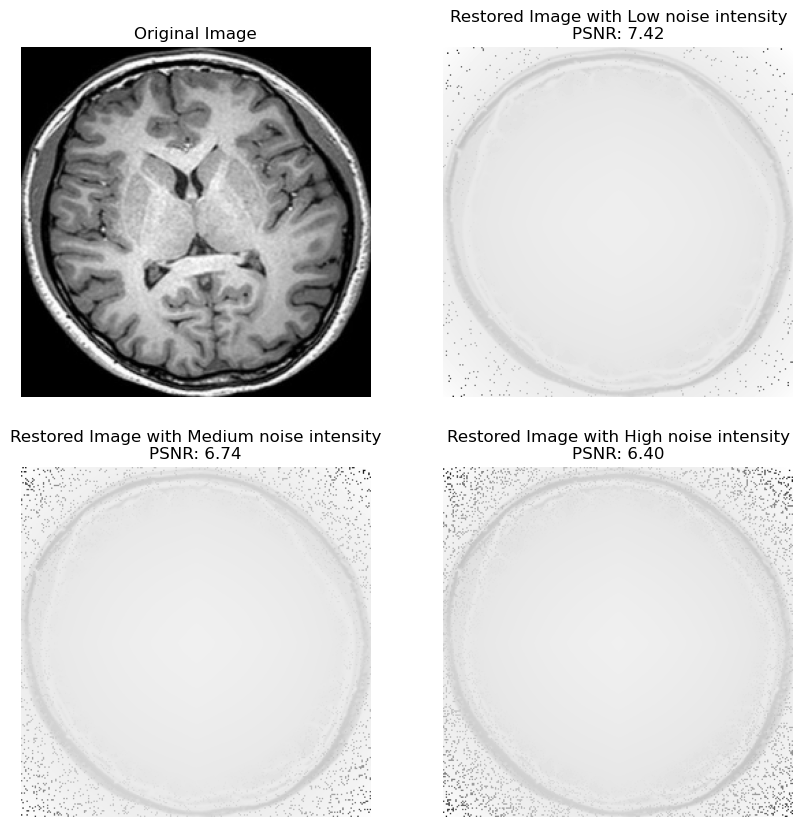

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_healthy_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_wiener_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_wiener_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_wiener_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_wiener_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_wiener_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_wiener_high))
plt.axis('off')

plt.show()

Because the Wiener filter is a linear filter, it is not effective in removing noise, since it does not take into account the non-linear nature of the noise.

## 4. Adaptive Wiener Filter
In this section, we will apply the adaptive Wiener filter to the noisy image with three different levels of noise.

In [18]:
restored_adapwiener_low = adaptive_wiener_filter(noisy_low)
psnr_adapwiener_low = calculate_psnr(original_healthy_img, restored_adapwiener_low)

In [19]:
restored_adapwiener_mid = adaptive_wiener_filter(noisy_mid)
psnr_adapwiener_mid = calculate_psnr(original_healthy_img, restored_adapwiener_mid)

In [20]:
restored_adapwiener_high = adaptive_wiener_filter(noisy_high)
psnr_adapwiener_high = calculate_psnr(original_healthy_img, restored_adapwiener_high)

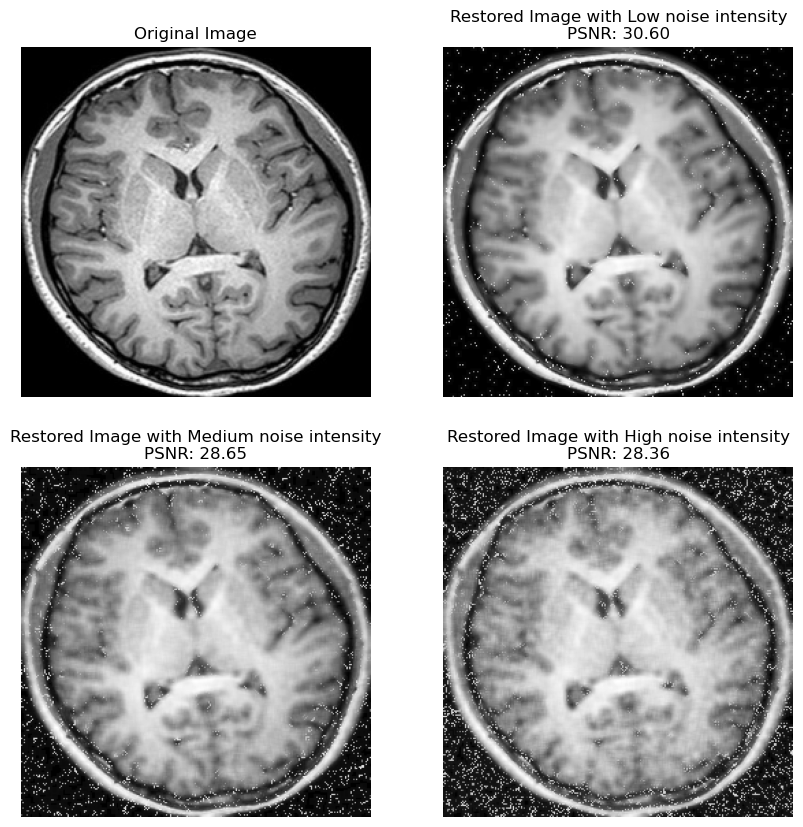

In [21]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_healthy_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_adapwiener_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_adapwiener_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_adapwiener_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_adapwiener_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_adapwiener_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_adapwiener_high))
plt.axis('off')

plt.show()

By comparing the results of wiener filter with adaptive wieiner filter, we can see that the adaptive wiener filter is more effective in removing noise than the wiener filter. This is because the adaptive wiener filter is able to adapt to the noise level in the image.

## 5. Bilateral Filter
In this section, we will apply the bilateral filter to the noisy image with three different levels of noise.

In [22]:
restored_bilateral_low = cv.bilateralFilter(noisy_low, 3, 75, 75)
psnr_bilateral_low = calculate_psnr(original_healthy_img, restored_bilateral_low)

In [23]:
restored_bilateral_mid = cv.bilateralFilter(noisy_high, 3, 75, 75)
psnr_bilateral_mid = calculate_psnr(original_healthy_img, restored_bilateral_mid)

In [24]:
restored_bilateral_high = cv.bilateralFilter(noisy_high, 3, 75, 75)
psnr_bilateral_high = calculate_psnr(original_healthy_img, restored_bilateral_high)

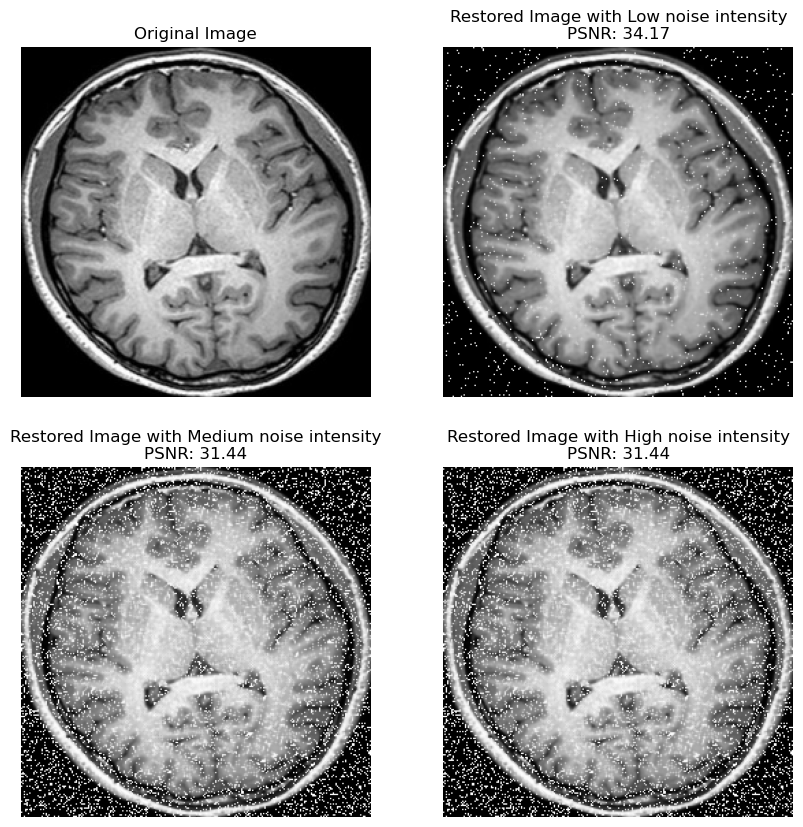

In [25]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_healthy_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_bilateral_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_bilateral_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_bilateral_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_bilateral_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_bilateral_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_bilateral_high))
plt.axis('off')

plt.show()

As we can see, the bilateral filter is not as effective as the adaptive median filter in removing noise. This is because the bilateral filter is not able to adapt to the noise level in the image.

## 6. Proposed K-SVD Algorithm
In this section, we will apply the proposed K-SVD algorithm to the noisy image with three different levels of noise.

In [41]:
edge_layer_low, residual_layer_low = bilateral_filter_decomposition(noisy_low)
denoised_residual_low = k_svd_denoising(residual_layer_low, patch_size=16, n_components=25, max_iter=2)
restored_ksvd_low = merge_layers(edge_layer_low, denoised_residual_low)
psnr_ksvd_low = calculate_psnr(original_healthy_img, restored_ksvd_low)

In [42]:
edge_layer_mid, residual_layer_mid = bilateral_filter_decomposition(noisy_mid)
denoised_residual_mid = k_svd_denoising(residual_layer_mid, patch_size=16, n_components=25, max_iter=2)
restored_ksvd_mid = merge_layers(edge_layer_mid, denoised_residual_mid)
psnr_ksvd_mid = calculate_psnr(original_healthy_img, restored_ksvd_mid)

In [43]:
edge_layer_high, residual_layer_high = bilateral_filter_decomposition(noisy_high)
denoised_residual_high = k_svd_denoising(residual_layer_high, patch_size=16, n_components=25, max_iter=2)
restored_ksvd_high = merge_layers(edge_layer_high, denoised_residual_high)
psnr_ksvd_high = calculate_psnr(original_healthy_img, restored_ksvd_high)

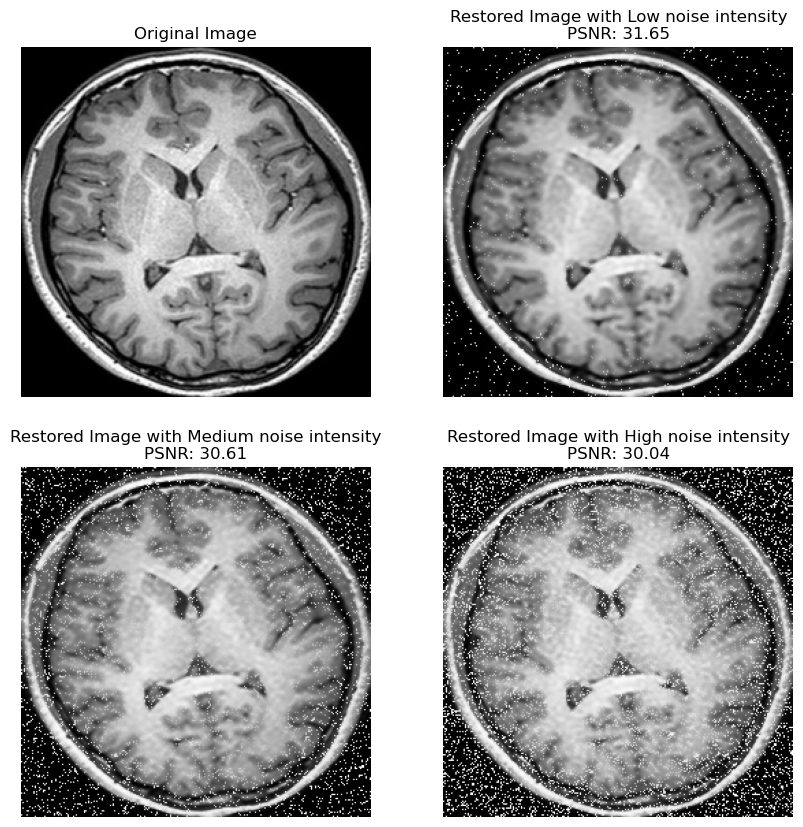

In [44]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_healthy_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_ksvd_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_ksvd_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_ksvd_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_ksvd_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_ksvd_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_ksvd_high))
plt.axis('off')

plt.show()

As we can see from the results, the proposed K-SVD algorithm is able to remove noise from the image effectively, even when the noise intensity is high. This is because the K-SVD algorithm is able to learn the noise pattern in the image and remove it effectively. However due to my machine limitations, I was not able to run the algorithm with optimal parameters. So the results may not be as expected.